<a href="https://colab.research.google.com/github/amandabinfeng/amandabinfeng.github.io/blob/master/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#pip install PyPortfolioOpt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import datetime
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices
plt.style.use('fivethirtyeight')

#from pypfopt.expected_returns import mean_historical_return
#from pypfopt.risk_models import CovarianceShrinkage

In [71]:
tickers=['COST','BABA','SOXX','PINS','CRM']
#tickers=['TFII','XPEV','BNS','DOL','SU','AC','RY','CJT.TO','CTC','BPO-PE.TO','EMA-PH.TO','BMO-PD.TO','BCE','BPO-PC.TO']

In [49]:
weights=np.array([0.2,0.2,0.2,0.2,0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [50]:
#get the stocks ending date (today)
#today=datetime.today().strftime('%Y-%m-%d')
#today

'2021-03-28'

In [72]:
#create a dataframe to store the historical prices
sec_price=pd.DataFrame()
sec_price=pdr.DataReader(tickers,'yahoo',start='2015-01-01')['Adj Close']

In [73]:
print(sec_price.head())
print(sec_price.tail())

Symbols          TFII  XPEV        BNS  ...  BMO-PD.TO        BCE  BPO-PC.TO
Date                                    ...                                 
2015-01-02  21.975645   NaN  41.621067  ...        NaN  33.987232        NaN
2015-01-05  21.759092   NaN  40.719826  ...        NaN  33.570934        NaN
2015-01-06  21.092113   NaN  39.974987  ...        NaN  33.637844        NaN
2015-01-07  21.092113   NaN  40.071819  ...        NaN  34.202808        NaN
2015-01-08  21.092113   NaN  40.369755  ...        NaN  34.433247        NaN

[5 rows x 14 columns]
Symbols          TFII       XPEV        BNS  ...  BMO-PD.TO        BCE  BPO-PC.TO
Date                                         ...                                 
2021-03-22  74.610001  37.880001  62.700001  ...  25.129999  46.029999  24.900000
2021-03-23  71.930000  36.330002  62.009998  ...  25.400000  45.759998  24.889999
2021-03-24  70.980003  30.850000  62.200001  ...  25.450001  45.709999  24.900000
2021-03-25  70.949997  32.52

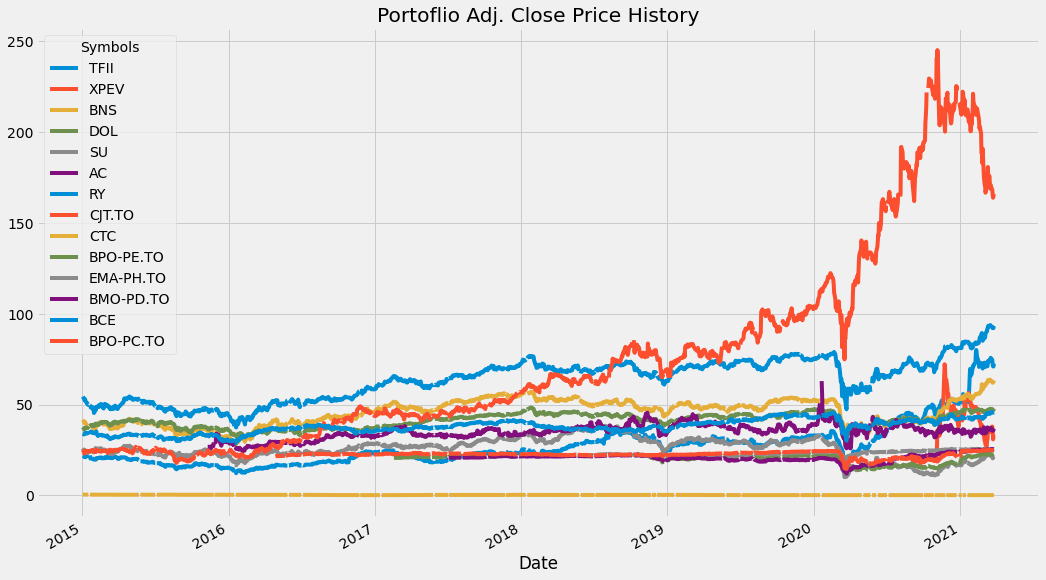

In [74]:
#visually show the stock/portfolio

sec_price.plot(figsize=(16,10))
plt.title('Portoflio Adj. Close Price History')
plt.show()

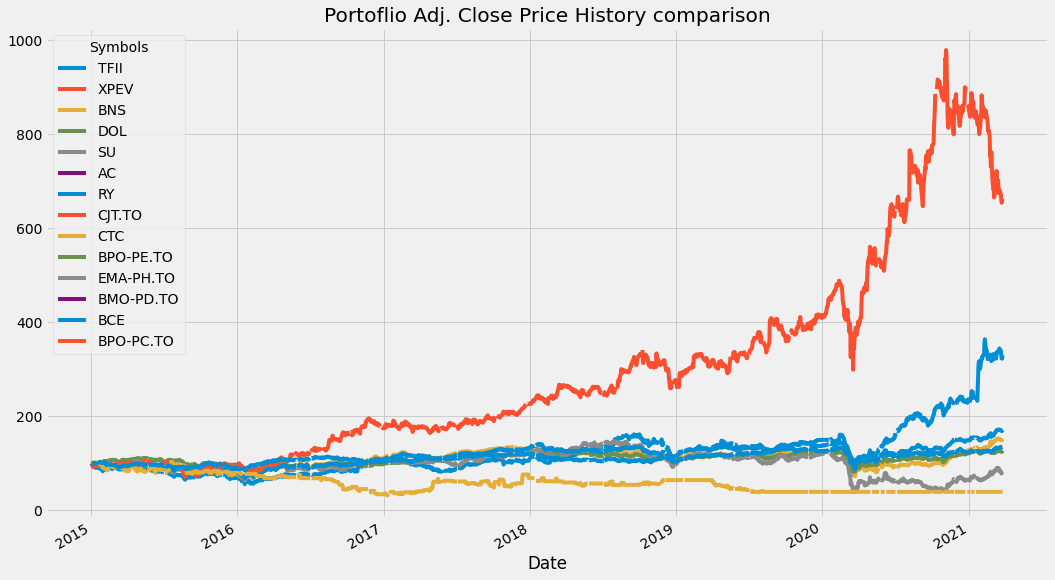

In [75]:
#visually show the stock/portfolio

(sec_price/sec_price.iloc[0]*100).plot(figsize=(16,10))
plt.title('Portoflio Adj. Close Price History comparison')
plt.show()

In [76]:
#calculate daily simple return
sec_returns=sec_price.pct_change()
sec_returns

Symbols,TFII,XPEV,BNS,DOL,SU,AC,RY,CJT.TO,CTC,BPO-PE.TO,EMA-PH.TO,BMO-PD.TO,BCE,BPO-PC.TO
Date,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.009854,NaN,-0.021653,-0.024270,-0.044437,NaN,-0.021152,-0.048263,0.022883,NaN,NaN,NaN,-0.012249,NaN
2015-01-06,-0.030653,NaN,-0.018292,-0.011886,-0.017151,NaN,-0.012668,-0.033807,0.000000,NaN,NaN,NaN,0.001993,NaN
2015-01-07,0.000000,NaN,0.002422,0.012253,0.001678,NaN,-0.000151,0.036581,-0.002237,NaN,NaN,NaN,0.016795,NaN
2015-01-08,0.000000,NaN,0.007435,0.016065,0.015745,NaN,0.005586,0.031453,0.000000,NaN,NaN,NaN,0.006737,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,-0.011133,0.010672,-0.003813,0.002722,-0.021798,-0.015612,-0.006223,-0.009600,0.000000,0.000000,0.003178,-0.009460,0.014771,0.000000
2021-03-23,-0.035920,-0.040919,-0.011005,-0.010652,-0.054318,-0.028986,-0.006586,-0.015936,0.000000,0.004464,0.004356,0.010744,-0.005866,-0.000402
2021-03-24,-0.013207,-0.150840,0.003064,-0.006755,0.036328,0.013236,0.004456,-0.010212,0.000000,0.004000,0.007492,0.001969,-0.001093,0.000402


In [77]:
sec_returns.mean()*250

Symbols
TFII         0.245374
XPEV         1.358193
BNS          0.094536
DOL          0.053612
SU           0.044531
AC           0.152647
RY           0.107826
CJT.TO       0.352395
CTC         -0.069488
BPO-PE.TO    0.047938
EMA-PH.TO    0.061160
BMO-PD.TO    0.068078
BCE          0.064857
BPO-PC.TO    0.049629
dtype: float64

In [78]:
#calcuate annualized covariance matrix
sec_annual_cov=sec_returns.cov()*252
sec_annual_cov

Symbols,TFII,XPEV,BNS,DOL,SU,AC,RY,CJT.TO,CTC,BPO-PE.TO,EMA-PH.TO,BMO-PD.TO,BCE,BPO-PC.TO
Symbols,,,,,,,,,,,,,,
TFII,0.119508,0.015092,0.037645,0.025921,0.046729,0.026467,0.032476,0.029406,-0.005548,0.026350,0.011996,0.023110,0.025569,0.023686
XPEV,0.015092,1.438834,0.023958,0.040996,0.051238,0.099718,0.039554,0.088699,0.000000,0.023346,0.000651,0.004773,-0.002464,0.014543
BNS,0.037645,0.023958,0.058320,0.032533,0.063698,0.032302,0.046510,0.020473,-0.000213,0.028292,0.011731,0.023485,0.032890,0.024865
DOL,0.025921,0.040996,0.032533,0.031946,0.042223,0.027872,0.029875,0.018967,0.000392,0.018189,0.008410,0.015157,0.022583,0.015212
SU,0.046729,0.051238,0.063698,0.042223,0.152200,0.044511,0.053934,0.026049,-0.001243,0.041301,0.014215,0.034865,0.040572,0.039926
AC,0.026467,0.099718,0.032302,0.027872,0.044511,0.202884,0.034420,0.017763,0.000109,0.016918,0.016612,0.017323,0.021881,0.010219
RY,0.032476,0.039554,0.046510,0.029875,0.053934,0.034420,0.047370,0.019904,0.000361,0.024769,0.011657,0.018442,0.029275,0.021064
CJT.TO,0.029406,0.088699,0.020473,0.018967,0.026049,0.017763,0.019904,0.112717,0.002800,0.014714,-0.002218,0.011017,0.015638,0.011838
CTC,-0.005548,0.000000,-0.000213,0.000392,-0.001243,0.000109,0.000361,0.002800,0.154011,-0.000702,0.000931,0.000107,0.001961,-0.000617


In [79]:
#calculate portfolio variance
portfolio_variance=np.dot(weights.T, np.dot(sec_annual_cov,weights))
portfolio_variance


ValueError: ignored

In [59]:
#calculate portfolio volatility aka standard deviation
portfolio_volatility=np.sqrt(portfolio_variance)
portfolio_volatility

0.292962665896222

In [60]:
#calcualte annual portfolio returns
portfolio_return=np.sum(weights*(sec_returns.mean()*252))
portfolio_return

0.3465686368755817

In [61]:
#show the expected annual return, volatility(risk),and variance
percent_variance=str(round(portfolio_variance,2)*100)+'%'
percent_volatility=str(round(portfolio_volatility,2)*100)+'%'
percent_return=str(round(portfolio_return,2)*100)+'%'

print('Expected Annual Return: '+percent_return)
print('Annual Volatility/Risk: '+percent_volatility)
print('Annual Variance: '+percent_variance)

Expected Annual Return: 35.0%
Annual Volatility/Risk: 28.999999999999996%
Annual Variance: 9.0%


In [80]:
#Portfolio Optimization!
#Calculate the historical returns and the annualized sample covaraince matrix of asset returns


ef_sec_return=expected_returns.mean_historical_return(sec_price)
print(ef_sec_return)
ef_sec_cov=risk_models.sample_cov(sec_price)
print(ef_sec_cov)


Symbols
TFII         0.207688
XPEV         1.037448
BNS          0.068371
DOL          0.038579
SU          -0.030855
AC           0.059197
RY           0.088733
CJT.TO       0.348564
CTC         -0.136270
BPO-PE.TO    0.021774
EMA-PH.TO    0.051865
BMO-PD.TO    0.053808
BCE          0.048071
BPO-PC.TO    0.029538
dtype: float64
Symbols        TFII      XPEV       BNS  ...  BMO-PD.TO       BCE  BPO-PC.TO
Symbols                                  ...                                
TFII       0.119508  0.015092  0.037645  ...   0.023110  0.025569   0.023686
XPEV       0.015092  1.438834  0.023958  ...   0.004773 -0.002464   0.014543
BNS        0.037645  0.023958  0.058320  ...   0.023485  0.032890   0.024865
DOL        0.025921  0.040996  0.032533  ...   0.015157  0.022583   0.015212
SU         0.046729  0.051238  0.063698  ...   0.034865  0.040572   0.039926
AC         0.026467  0.099718  0.032302  ...   0.017323  0.021881   0.010219
RY         0.032476  0.039554  0.046510  ...   0.0184

In [81]:
#optimize for max sharpe ratio
ef_portfolio=EfficientFrontier(ef_sec_return,ef_sec_cov)
ef_weights=ef_portfolio.max_sharpe(risk_free_rate=0.0025)
ef_opt_weights=ef_portfolio.clean_weights()
#ef_portfolio.save_weights_to_file(r"C:\Users\fenga\Documents\PythonScripts\weights.txt")  # saves to file
print(ef_opt_weights)
ef_portfolio.portfolio_performance(verbose=True, risk_free_rate=0.0025)


OrderedDict([('TFII', 0.14364), ('XPEV', 0.0953), ('BNS', 0.0), ('DOL', 0.0), ('SU', 0.0), ('AC', 0.0), ('RY', 0.0), ('CJT.TO', 0.4182), ('CTC', 0.0), ('BPO-PE.TO', 0.0), ('EMA-PH.TO', 0.34285), ('BMO-PD.TO', 0.0), ('BCE', 0.0), ('BPO-PC.TO', 0.0)])
Expected annual return: 29.2%
Annual volatility: 22.2%
Sharpe Ratio: 1.30


(0.2922587368633061, 0.22236653135924261, 1.3030681150266652)

In [82]:
#optimize the discrete allocation of each security
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices

latest_prices=get_latest_prices(sec_price)
Budget_Allocation=DiscreteAllocation(ef_opt_weights,latest_prices,total_portfolio_value=10000)
allocation,leftover=Budget_Allocation.lp_portfolio()
print('Allocation:' + str(allocation))
print('Funds remaining: ${:.2f}'.format(leftover))



Allocation:{'TFII': 20, 'XPEV': 30, 'CJT.TO': 25, 'EMA-PH.TO': 134}
Funds remaining: $8.15
